# M-values

Various ways to view them. (And also how to use `diyzhl` code.)

**Note** that these show both 4- and 5-minute compartments. For deco calculations you pick one or the other, but this is not deco calculations.

## Step 1: intialize the `tcs` data with ZH-L16C nitrogen values. 

  - Convert Buhlmann's $ a, b $ to Workman's $ M_0, \Delta M $ with `diyzhl.m_b2w()`.
  
  - The `if` siply renames the 4-minute compartment to `tcs[0]` and 5-minute one: to `tcs[1]`.
 

In [1]:
import diyzhl

tcs = {}

for i in diyzhl.ZHL16N.keys() :

    (m0, dm) = diyzhl.m_b2w( a = diyzhl.ZHL16N[i]["a"]["C"], b = diyzhl.ZHL16N[i]["b"])

    if i == 1 :
        tcs[0] = { "t" : diyzhl.ZHL16N[i]["t"], "m0" : m0, "dm" : dm }
    elif i == 1.1 :
        tcs[1] = { "t" : diyzhl.ZHL16N[i]["t"], "m0": m0, "dm": dm }
    else :
        tcs[i] = { "t" : diyzhl.ZHL16N[i]["t"], "m0" : m0, "dm" : dm }


## 2: a table

(pandas dataframe b/c the notebook will render it nicely)

The last two columns are surfacing M-value and M-value at 7 bar (60 msw). Rounded to 4 decimal digits, as usual.

**Note** that the values are in bar. In the literature they are often given in `msw`, i.e. $ bar * 10 $ instead.

In [2]:
from IPython.display import display
import pandas

df = pandas.DataFrame( { "t" : list( tcs[i]["t"] for i in tcs.keys() ), 
            "M0" : list( tcs[i]["m0"] for i in tcs.keys() ),
            "dM" : list( tcs[i]["dm"] for i in tcs.keys() ),
            "Msurf" : list( round( tcs[i]["m0"] + tcs[i]["dm"], 4 ) for i in tcs.keys() ),
            "M60m" : list( round( tcs[i]["m0"] + tcs[i]["dm"] * 7.0, 4 ) for i in tcs.keys() ) } )

display( df )


,t,M0,dM,Msurf,M60m
0,4.0,3.2401,1.9802,5.2203,17.1015
1,5.0,2.9624,1.7928,4.7552,15.5120
2,8.0,2.5352,1.5352,4.0704,13.2816
3,12.5,2.2465,1.3847,3.6312,11.9394
4,18.5,2.0342,1.2780,3.3122,10.9802
5,27.0,1.8506,1.2306,3.0812,10.4648
6,38.3,1.6900,1.1857,2.8757,9.9899
7,54.3,1.5914,1.1504,2.7418,9.6442
8,77.0,1.5223,1.1223,2.6446,9.3784
9,109.0,1.4749,1.0999,2.5748,9.1742


## 3: M-value vs  Tissue compartment

Populating the interactive namespace from numpy and matplotlib


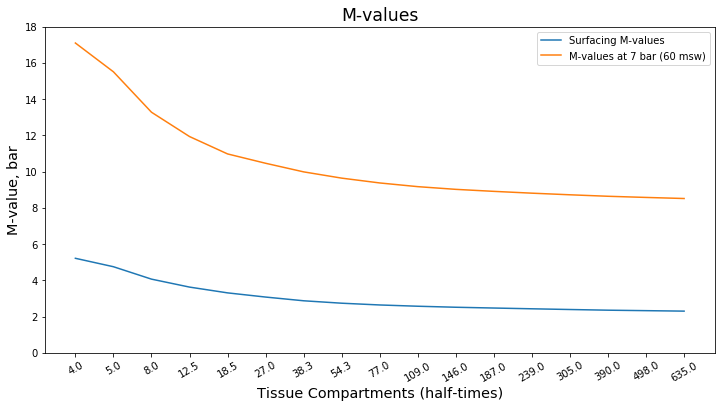

In [3]:
%pylab inline

import matplotlib.pyplot as plt
       
ax = df.plot( y = [ "Msurf", "M60m" ], figsize = (12, 6) )
ax.set_xticks( df.index )
ax.set_xticklabels( df.t, rotation = 30 )
ax.set_title( "M-values", fontsize = 'xx-large' )
ax.set_xlabel( "Tissue Compartments (half-times)", fontsize = 'x-large')
ax.set_ylabel( "M-value, bar", fontsize = 'x-large')
ax.legend( ("Surfacing M-values", "M-values at 7 bar (60 msw)" ) )
ax.set_ylim( 0, 18 )
plt.show()


## 4: M-value vs depth

(a line per tissue compartment)

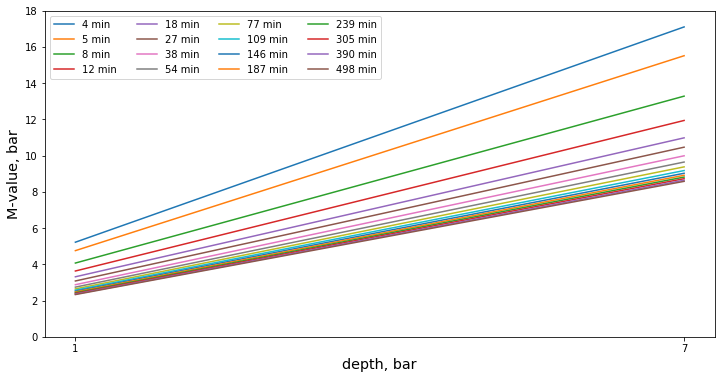

In [4]:

fig, ax = plt.subplots( figsize = (12, 6) )
ax.set_ylim( 0, 18 )
ax.set_ylabel( "M-value, bar", fontsize = "x-large" )
ax.set_xticks( (0,1) )
ax.set_xticklabels( (1,7) )
ax.set_xlabel( "depth, bar", fontsize = "x-large" )

for i in range( 0, 16 ) :
    plt.plot( [df.loc[i,"Msurf"], df.loc[i,"M60m"]], label = "%d min" % (df.loc[i, "t"],) )


legend = ax.legend(loc='upper left', ncol = 4 )           
plt.show()

## Tissue compartments as the 3rd dimension


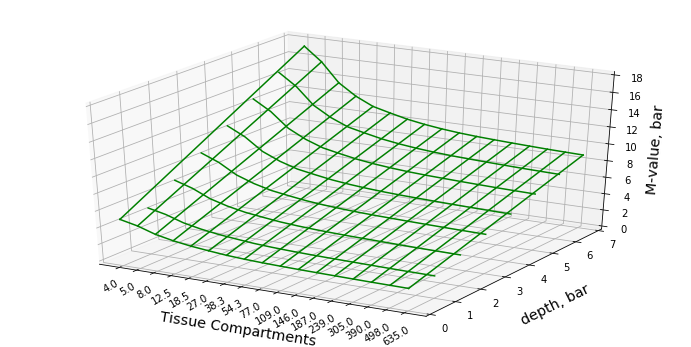

In [5]:
from mpl_toolkits.mplot3d import Axes3D

ts = list( df.index )

fig = plt.figure( figsize = (12, 6) )
ax = fig.gca( projection = "3d" )

ax.set_xticks( ts )
ax.set_xticklabels( list( df.t ), rotation = "30" )
ax.set_ylim( 0, 7 )
ax.set_zlim( 0, 18 )

for i in df.index : 
    ax.plot( xs = [0, 7], ys = [df.loc[i].Msurf, df.loc[i].M60m], zs = i, zdir = "x", c = "g" )

for j in range( 1, 7 ) :
    Y = list( round( df.iloc[i].M0 + df.iloc[i].dM * float( j ), 4 ) for i in df.index )

    ax.plot( xs = ts, ys = Y, zs = j, zdir = "y", c = "g" )

Ms = list( df.Msurf )
M6 = list( df.M60m )
ax.plot( xs = ts, ys = Ms, zs = 0, zdir = "y", c = "g" )
ax.plot( xs = ts, ys = M6, zs = 7, zdir = "y", c = "g" )

ax.set_xlabel( "\n\nTissue Compartments", fontsize = 'x-large')
ax.set_ylabel( "\n\ndepth, bar", fontsize = 'x-large')
ax.set_zlabel( "M-value, bar", fontsize = "x-large" )
plt.savefig( "mvalues.svg", format = "svg" )
plt.show()



## 5. Gradient Factors

don't directly translate to percent gas loading because they modify Buhlmann's coefficients rather than Workman's M-values, and Buhlmann to Workman conversion requires the current gas loading in the tissue.

Below, Buhlman's "ceiling" for ZH-L16B tissue compartment 1 is calculated at gas loading equal to Workman's $ M_0 $ at the surface, $ c1 $ is the ceiling at GF = 1 and $ c2 $: at GF 0.75. 


In [25]:
(m0, dm) = diyzhl.m_b2w( a = diyzhl.ZHL16N[1]["a"]["B"], b = diyzhl.ZHL16N[1]["b"])
c1 = diyzhl.buhlmann( Pn = m0, an = diyzhl.ZHL16N[1]["a"]["B"], bn = diyzhl.ZHL16N[1]["b"], gf = 1 )
c2 = diyzhl.buhlmann( Pn = m0, an = diyzhl.ZHL16N[1]["a"]["B"], bn = diyzhl.ZHL16N[1]["b"], gf = 0.75 )

print( m0 )
print( c1 )
print( c2 )
print( int( c1/(c2/100.0) ) )

l = diyzhl.schreiner( Pi = 3.2401, Palv = diyzhl.palv( Pamb = 1.3228, Q = 0.79, RQ = 0.9 ), t = 2 )
print( l )

print( int( l/(m0/100.0) ) )


c3 = diyzhl.buhlmann( Pn = l, an = diyzhl.ZHL16N[1]["a"]["B"], bn = diyzhl.ZHL16N[1]["b"], gf = 0.75 )
print( c3 )

3.2401
1.0
1.3228
75
2.6978
83
1.0102
